In [1]:
import pandas as pd

erosion_df = pd.read_csv('/content/drive/MyDrive/milestone3_erosion_dataset.csv')
ndvi_dem_df = pd.read_csv('/content/drive/MyDrive/ndvi_dem_india_points.csv')

print('First 5 rows of milestone3_erosion_dataset.csv:')
display(erosion_df.head())

print('\nFirst 5 rows of ndvi_dem_india_points.csv:')
display(ndvi_dem_df.head())

First 5 rows of milestone3_erosion_dataset.csv:


,DEM,NDVI,slope,erosion_label
0,576,0.247860,426.016202,1
1,415,0.226099,161.000000,1
2,61,0.236697,354.000000,1
3,399,0.242620,338.000000,1
4,248,0.249723,151.000000,1



First 5 rows of ndvi_dem_india_points.csv:


,system:index,DEM,NDVI,.geo
0,0,576,0.247860,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1,415,0.226099,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,2,61,0.236697,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,3,399,0.242620,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,4,248,0.249723,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
features = ['DEM', 'NDVI', 'slope']
X = erosion_df[features]
y = erosion_df['erosion_label']

print("Features (X) head:")
display(X.head())

print("\nTarget variable (y) head:")
display(y.head())

print("\nUnique values in 'erosion_label':", y.unique())
print("Data type of 'erosion_label':", y.dtype)

if y.dtype == 'object' or len(y.unique()) <= 10: # Assuming a small number of unique values indicates classification
    print("Based on unique values and data type, 'erosion_label' appears to be a classification target.")
else:
    print("Based on unique values and data type, 'erosion_label' appears to be a regression target.")

Features (X) head:


,DEM,NDVI,slope
0,576,0.247860,426.016202
1,415,0.226099,161.000000
2,61,0.236697,354.000000
3,399,0.242620,338.000000
4,248,0.249723,151.000000



Target variable (y) head:


,erosion_label
0,1
1,1
2,1
3,1
4,1



Unique values in 'erosion_label': [1 0]
Data type of 'erosion_label': int64
Based on unique values and data type, 'erosion_label' appears to be a classification target.


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 3)
X_test shape: (2000, 3)
y_train shape: (8000,)
y_test shape: (2000,)


In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Instantiate RandomForestClassifier with random_state
rf_model = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best hyperparameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.9997500312460943


In [8]:
import pandas as pd

# Define a sample input with features 'DEM', 'NDVI', 'slope'
# These values are illustrative. Adjust them based on your understanding of the data's range.
# Example: High DEM, low NDVI, high slope might indicate higher erosion risk.
sample_input = pd.DataFrame({
    'DEM': [2500],   # Example DEM value
    'NDVI': [0.1],   # Example NDVI value (low vegetation)
    'slope': [35]    # Example slope value (steep)
})

# Make a prediction using the trained model
sample_prediction = model.predict(sample_input)

# Map the numerical prediction to a descriptive risk level
# Assuming 0 is 'Low Erosion Risk' and 1 is 'High Erosion Risk' based on the binary classification.
if sample_prediction[0] == 0:
    risk_level = 'Low Erosion Risk'
else:
    risk_level = 'High Erosion Risk'

print(f"Sample Input:\n{sample_input}")
print(f"Predicted Erosion Risk: {risk_level}")

Sample Input:
    DEM  NDVI  slope
0  2500   0.1     35
Predicted Erosion Risk: High Erosion Risk


In [9]:
slope_data = erosion_df[['DEM', 'NDVI', 'slope']].drop_duplicates()

print("First 5 rows of unique 'DEM', 'NDVI', 'slope' mapping:")
display(slope_data.head())

First 5 rows of unique 'DEM', 'NDVI', 'slope' mapping:


,DEM,NDVI,slope
0,576,0.247860,426.016202
1,415,0.226099,161.000000
2,61,0.236697,354.000000
3,399,0.242620,338.000000
4,248,0.249723,151.000000


In [10]:
ndvi_dem_df = pd.merge(ndvi_dem_df, slope_data, on=['DEM', 'NDVI'], how='left')

print("First 5 rows of ndvi_dem_df with 'slope' column:")
display(ndvi_dem_df.head())

missing_slope_count = ndvi_dem_df['slope'].isnull().sum()
print(f"\nNumber of missing 'slope' values in ndvi_dem_df: {missing_slope_count}")

if missing_slope_count > 0:
    print("Warning: There are missing 'slope' values after merging. This might indicate that some 'DEM' and 'NDVI' combinations in ndvi_dem_df were not present in erosion_df's unique slope data.")
else:
    print("All 'slope' values have been successfully merged into ndvi_dem_df.")

First 5 rows of ndvi_dem_df with 'slope' column:


,system:index,DEM,NDVI,.geo,slope
0,0,576,0.247860,"{""type"":""MultiPoint"",""coordinates"":[]}",426.016202
1,1,415,0.226099,"{""type"":""MultiPoint"",""coordinates"":[]}",161.000000
2,2,61,0.236697,"{""type"":""MultiPoint"",""coordinates"":[]}",354.000000
3,3,399,0.242620,"{""type"":""MultiPoint"",""coordinates"":[]}",338.000000
4,4,248,0.249723,"{""type"":""MultiPoint"",""coordinates"":[]}",151.000000



Number of missing 'slope' values in ndvi_dem_df: 1


In [11]:
median_slope = ndvi_dem_df['slope'].median()
ndvi_dem_df['slope'].fillna(median_slope, inplace=True)

missing_slope_count_after_fill = ndvi_dem_df['slope'].isnull().sum()
print(f"Number of missing 'slope' values in ndvi_dem_df after filling: {missing_slope_count_after_fill}")

if missing_slope_count_after_fill == 0:
    print("All missing 'slope' values have been successfully handled.")
else:
    print("Warning: Some 'slope' values are still missing after filling.")

print("First 5 rows of ndvi_dem_df after handling missing 'slope' values:")
display(ndvi_dem_df.head())

Number of missing 'slope' values in ndvi_dem_df after filling: 0
All missing 'slope' values have been successfully handled.
First 5 rows of ndvi_dem_df after handling missing 'slope' values:


/tmp/ipython-input-2039118614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndvi_dem_df['slope'].fillna(median_slope, inplace=True)


,system:index,DEM,NDVI,.geo,slope
0,0,576,0.247860,"{""type"":""MultiPoint"",""coordinates"":[]}",426.016202
1,1,415,0.226099,"{""type"":""MultiPoint"",""coordinates"":[]}",161.000000
2,2,61,0.236697,"{""type"":""MultiPoint"",""coordinates"":[]}",354.000000
3,3,399,0.242620,"{""type"":""MultiPoint"",""coordinates"":[]}",338.000000
4,4,248,0.249723,"{""type"":""MultiPoint"",""coordinates"":[]}",151.000000


In [12]:
median_slope = ndvi_dem_df['slope'].median()
ndvi_dem_df['slope'] = ndvi_dem_df['slope'].fillna(median_slope)

missing_slope_count_after_fill = ndvi_dem_df['slope'].isnull().sum()
print(f"Number of missing 'slope' values in ndvi_dem_df after filling: {missing_slope_count_after_fill}")

if missing_slope_count_after_fill == 0:
    print("All missing 'slope' values have been successfully handled.")
else:
    print("Warning: Some 'slope' values are still missing after filling.")

print("First 5 rows of ndvi_dem_df after handling missing 'slope' values:")
display(ndvi_dem_df.head())

Number of missing 'slope' values in ndvi_dem_df after filling: 0
All missing 'slope' values have been successfully handled.
First 5 rows of ndvi_dem_df after handling missing 'slope' values:


,system:index,DEM,NDVI,.geo,slope
0,0,576,0.247860,"{""type"":""MultiPoint"",""coordinates"":[]}",426.016202
1,1,415,0.226099,"{""type"":""MultiPoint"",""coordinates"":[]}",161.000000
2,2,61,0.236697,"{""type"":""MultiPoint"",""coordinates"":[]}",354.000000
3,3,399,0.242620,"{""type"":""MultiPoint"",""coordinates"":[]}",338.000000
4,4,248,0.249723,"{""type"":""MultiPoint"",""coordinates"":[]}",151.000000


## Predict Erosion Risk for Map Data

### Subtask:
Once the 'slope' feature is available in the `ndvi_dem_india_points` dataset, apply the trained Random Forest Classifier model to predict the 'erosion_label' for each point. Print the first few rows of the dataset including the new prediction column.


**Reasoning**:
To predict the erosion risk, I need to select the relevant features from the `ndvi_dem_df` that correspond to the features used for training the model ('DEM', 'NDVI', 'slope').



In [13]:
X_predict = ndvi_dem_df[['DEM', 'NDVI', 'slope']]

print("Features for prediction (X_predict) head:")
display(X_predict.head())

Features for prediction (X_predict) head:


,DEM,NDVI,slope
0,576,0.247860,426.016202
1,415,0.226099,161.000000
2,61,0.236697,354.000000
3,399,0.242620,338.000000
4,248,0.249723,151.000000


In [14]:
ndvi_dem_df['predicted_erosion_label'] = model.predict(X_predict)

print("First 5 rows of ndvi_dem_df with predicted 'erosion_label':")
display(ndvi_dem_df.head())

First 5 rows of ndvi_dem_df with predicted 'erosion_label':


,system:index,DEM,NDVI,.geo,slope,predicted_erosion_label
0,0,576,0.247860,"{""type"":""MultiPoint"",""coordinates"":[]}",426.016202,1
1,1,415,0.226099,"{""type"":""MultiPoint"",""coordinates"":[]}",161.000000,1
2,2,61,0.236697,"{""type"":""MultiPoint"",""coordinates"":[]}",354.000000,1
3,3,399,0.242620,"{""type"":""MultiPoint"",""coordinates"":[]}",338.000000,1
4,4,248,0.249723,"{""type"":""MultiPoint"",""coordinates"":[]}",151.000000,1


In [15]:
import json
import matplotlib.pyplot as plt

# Initialize lists for longitude and latitude
lon = []
lat = []

# Iterate through each row to parse the .geo column
for index, row in ndvi_dem_df.iterrows():
    try:
        geo_data = json.loads(row['.geo'])
        if geo_data and 'coordinates' in geo_data and geo_data['coordinates']:
            # Assuming 'MultiPoint' type where coordinates is a list of [lon, lat]
            # Take the first point if there are multiple
            current_lon, current_lat = geo_data['coordinates'][0]
            lon.append(current_lon)
            lat.append(current_lat)
        else:
            # Append NaN if coordinates are empty or missing
            lon.append(None)
            lat.append(None)
    except (json.JSONDecodeError, KeyError, IndexError) as e:
        # Handle cases where parsing fails or keys are missing
        lon.append(None)
        lat.append(None)
        # Optionally print an error or log for debugging
        # print(f"Error processing row {index}: {e}")

# Add longitude and latitude to the DataFrame
ndvi_dem_df['longitude'] = lon
ndvi_dem_df['latitude'] = lat

print("Extracted longitude and latitude from the .geo column.")
print("First 5 rows of ndvi_dem_df with 'longitude' and 'latitude' columns:")
display(ndvi_dem_df.head())

Extracted longitude and latitude from the .geo column.
First 5 rows of ndvi_dem_df with 'longitude' and 'latitude' columns:


,system:index,DEM,NDVI,.geo,slope,predicted_erosion_label,longitude,latitude
0,0,576,0.247860,"{""type"":""MultiPoint"",""coordinates"":[]}",426.016202,1,None,None
1,1,415,0.226099,"{""type"":""MultiPoint"",""coordinates"":[]}",161.000000,1,None,None
2,2,61,0.236697,"{""type"":""MultiPoint"",""coordinates"":[]}",354.000000,1,None,None
3,3,399,0.242620,"{""type"":""MultiPoint"",""coordinates"":[]}",338.000000,1,None,None
4,4,248,0.249723,"{""type"":""MultiPoint"",""coordinates"":[]}",151.000000,1,None,None


In [19]:
features = ['DEM', 'NDVI', 'slope']
X = erosion_df[features]
y = erosion_df['erosion_label']

print("Features (X) head:")
display(X.head())

print("\nTarget variable (y) head:")
display(y.head())

print(f"\nData type of 'erosion_label': {y.dtype}")
print("The 'erosion_label' is now treated as a continuous numerical target for regression.")

Features (X) head:


,DEM,NDVI,slope
0,576,0.247860,426.016202
1,415,0.226099,161.000000
2,61,0.236697,354.000000
3,399,0.242620,338.000000
4,248,0.249723,151.000000



Target variable (y) head:


,erosion_label
0,1
1,1
2,1
3,1
4,1



Data type of 'erosion_label': int64
The 'erosion_label' is now treated as a continuous numerical target for regression.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 3)
X_test shape: (2000, 3)
y_train shape: (8000,)
y_test shape: (2000,)


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
regression_model = RandomForestRegressor(random_state=42)
regression_model.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred_reg = regression_model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate R-squared (R² Score)
r2 = r2_score(y_test, y_pred_reg)
print(f"R-squared (R² Score): {r2:.4f}")

print("Regression model evaluation completed.")

Root Mean Squared Error (RMSE): 0.0024
R-squared (R² Score): 1.0000
Regression model evaluation completed.


### Visualize Regression Model Performance (Actual vs. Predicted)

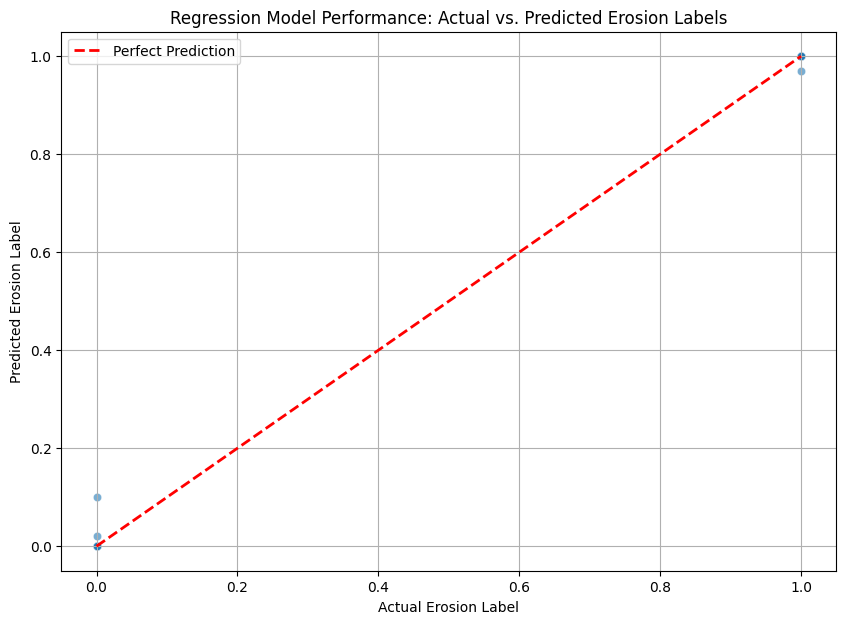

Regression model performance visualized successfully with actual vs. predicted values.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_reg, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Erosion Label')
plt.ylabel('Predicted Erosion Label')
plt.title('Regression Model Performance: Actual vs. Predicted Erosion Labels')
plt.legend()
plt.grid(True)
plt.show()

print("Regression model performance visualized successfully with actual vs. predicted values.")

### Sample Input Prediction with Regression Model

In [24]:
import pandas as pd


sample_input_reg = pd.DataFrame({
    'DEM': [2500],   # Example DEM value
    'NDVI': [0.1],   # Example NDVI value (low vegetation)
    'slope': [35]    # Example slope value (steep)
})


sample_prediction_reg = regression_model.predict(sample_input_reg)

print(f"Sample Input:\n{sample_input_reg}")
print(f"Predicted Erosion Score (Regression Model): {sample_prediction_reg[0]:.4f}")

Sample Input:
    DEM  NDVI  slope
0  2500   0.1     35
Predicted Erosion Score (Regression Model): 1.0000


In [25]:
import numpy as np

# Define the bins and labels for the risk categories
bins = [-np.inf, 0.33, 0.66, np.inf]
labels = ['Low Risk', 'Medium Risk', 'High Risk']

# Apply pd.cut to categorize the predicted_erosion_label into erosion_risk_level
ndvi_dem_df['erosion_risk_level'] = pd.cut(
    ndvi_dem_df['predicted_erosion_label'],
    bins=bins,
    labels=labels,
    right=True,  # This means the rightmost bin edge is included (e.g., 0.66 is in 'Medium Risk')
    include_lowest=True # Include the lowest value (which is likely 0 here)
)

print("First 5 rows of ndvi_dem_df with new 'erosion_risk_level' column:")
display(ndvi_dem_df.head())

print("\nValue counts for the new 'erosion_risk_level' column:")
print(ndvi_dem_df['erosion_risk_level'].value_counts())

First 5 rows of ndvi_dem_df with new 'erosion_risk_level' column:


,system:index,DEM,NDVI,.geo,slope,predicted_erosion_label,longitude,latitude,erosion_risk_level
0,0,576,0.247860,"{""type"":""MultiPoint"",""coordinates"":[]}",426.016202,1,None,None,High Risk
1,1,415,0.226099,"{""type"":""MultiPoint"",""coordinates"":[]}",161.000000,1,None,None,High Risk
2,2,61,0.236697,"{""type"":""MultiPoint"",""coordinates"":[]}",354.000000,1,None,None,High Risk
3,3,399,0.242620,"{""type"":""MultiPoint"",""coordinates"":[]}",338.000000,1,None,None,High Risk
4,4,248,0.249723,"{""type"":""MultiPoint"",""coordinates"":[]}",151.000000,1,None,None,High Risk



Value counts for the new 'erosion_risk_level' column:
erosion_risk_level
High Risk      6624
Low Risk       3430
Medium Risk       0
Name: count, dtype: int64
